In [2]:
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
sp = spacy

In [3]:
movie = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=["reviews", "rating"])
movie

,reviews,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [4]:
movie['labels'] = movie["rating"].apply(lambda x: "Positive" if x else "Negative")
movie 

,reviews,rating,labels
0,"A very, very, very slow-moving, aimless movie ...",0,Negative
1,Not sure who was more lost - the flat characte...,0,Negative
2,Attempting artiness with black & white and cle...,0,Negative
3,Very little music or anything to speak of.,0,Negative
4,The best scene in the movie was when Gerardo i...,1,Positive
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,Negative
744,"Unfortunately, any virtue in this film's produ...",0,Negative
745,"In a word, it is embarrassing.",0,Negative
746,Exceptionally bad!,0,Negative


In [5]:
movie.isna().sum()

reviews    0
rating     0
labels     0
dtype: int64

In [6]:
movie['length'] = movie['reviews'].apply(lambda x: len(str(x).split(' ')))
movie

,reviews,rating,labels,length
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15
1,Not sure who was more lost - the flat characte...,0,Negative,21
2,Attempting artiness with black & white and cle...,0,Negative,33
3,Very little music or anything to speak of.,0,Negative,10
4,The best scene in the movie was when Gerardo i...,1,Positive,23
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,Negative,13
744,"Unfortunately, any virtue in this film's produ...",0,Negative,16
745,"In a word, it is embarrassing.",0,Negative,8
746,Exceptionally bad!,0,Negative,4


In [7]:
movie['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800])

<BarContainer object of 55 artists>

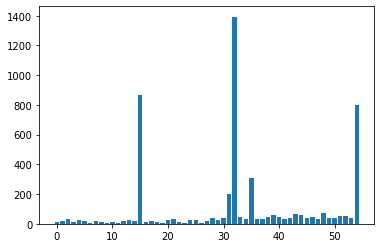

In [8]:
unique_lengths = movie['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

In [9]:
X = movie['reviews']
y = movie['rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .40, random_state = 60)

In [11]:
X_train.shape, X_train.to_list()[:4]

((448,),
 ['I am so tired of clichés that is just lazy writing, and here they come in thick and fast.  ',
  'Nothing short of magnificent photography/cinematography in this film.  ',
  'The acting was bad, the dialogs were extremely shallow and insincere.  ',
  "The soundtrack wasn't terrible, either.  "])

In [18]:
vectorizer = Pipeline([
    ('Bag_of_words', CountVectorizer(stop_words = 'english')), 
    ('Term_freq', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [19]:
model = vectorizer.fit(X_train, y_train)

In [20]:
model_predict = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       155
           1       0.72      0.86      0.78       145

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [23]:
accurancy = []
stratifiedKf_predict = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
stratifiedKf_predict.get_n_splits(X,y)

for train_index, test_index in stratifiedKf_predict.split(X,y):
   
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
  
    vectorizer.fit(X1_train, y1_train)
    result = vectorizer.score(X1_test, y1_test)
    accurancy.append(result)

accuracy = np.array(accurancy)

print(accurancy)
print(f"mean_accuarcy = {accuracy.mean():.4f}, std_accuracy = {accuracy.std():.4f}")  

[0.7866666666666666, 0.7933333333333333, 0.7533333333333333, 0.7651006711409396, 0.7449664429530202]
mean_accuarcy = 0.7687, std_accuracy = 0.0187


In [24]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.
